In [1]:
import pandas as pd

In [5]:
%%time
#fcd_df = pd.read_csv("london_u6.6_5sp_5.0bmult.small.fcd.out.csv",sep=',',engine='c')
#I deleted the file and changed the storage to HDF5

Wall time: 1min 12s


In [2]:
store = pd.HDFStore("london_dua60.h5")

In [3]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: london_dua60.h5
/edgeinfo_df             frame        (shape->[309919,11]) 
/fcd_df                  frame        (shape->[75908839,7])
/queue_df                frame        (shape->[7852735,5]) 
/tripinfos_df            frame        (shape->[22511,18])  

In [4]:
%%time
fcd_df = store["fcd_df"]

Wall time: 1min 36s


In [5]:
fcd_df

,timestep_time,vehicle_lane,vehicle_id,vehicle_pos,vehicle_x,vehicle_y,vehicle_speed
0,0,130111983_0,5502,5.10,15076.47,24764.82,17.88
1,1,156297569#0_1,10021,5.10,16459.81,28670.45,13.41
2,1,156297569#0_0,10090,5.10,16460.17,28673.73,13.41
3,1,315328585#0_0,10946,5.10,45376.82,31567.65,12.49
4,1,23125069_0,13979,5.10,31012.72,34724.75,13.41
5,1,2372214#0_0,14278,5.10,25914.66,26083.98,8.94
6,1,2372214#0_1,14840,5.10,25911.86,26082.23,8.94
7,1,2599786#0_0,16012,5.10,17727.20,37360.18,22.35
8,1,4316126#1_0,16962,5.10,39497.39,17315.27,22.35
9,1,238222125#0_0,17216,5.10,39125.81,17467.62,13.41


In [6]:
fcd_df["vehicle_speed"].describe()

count    7.590884e+07
mean     6.560297e+00
std      7.477483e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.820000e+00
75%      1.257000e+01
max      3.129000e+01
Name: vehicle_speed, dtype: float64

In [7]:
(fcd_df.loc[fcd_df["vehicle_speed"] != 0,"vehicle_speed"]).describe()

count    4.432062e+07
mean     1.123596e+01
std      6.574756e+00
min      1.000000e-02
25%      7.740000e+00
50%      1.220000e+01
75%      1.334000e+01
max      3.129000e+01
Name: vehicle_speed, dtype: float64

In [14]:
fcd_df["vehicle_speed"].hist()

In [15]:
plt.savefig("vehicle_speed_hist.jpg")

In [9]:
import matplotlib.pyplot as plt

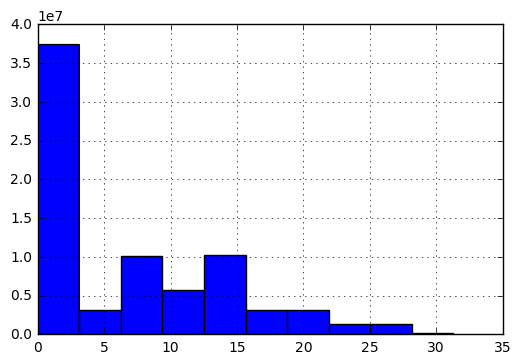

In [10]:
plt.show()

In [11]:
lane_mean_speed = fcd_df[["vehicle_lane","vehicle_speed"]].groupby("vehicle_lane").mean()

In [22]:
lane_mean_speed.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000037BC8E978>]], dtype=object)

In [19]:
plt.savefig("vehicle_speed_per_lane_hist.jpg")

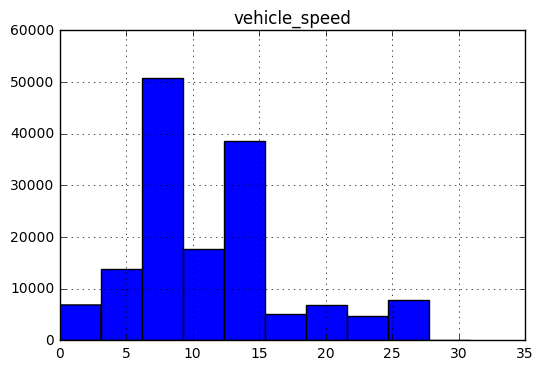

In [23]:
plt.show()